INTRODUCTION 

It is a Loan Approval Status dataset,it contain the collection of loan applications,each described by a set of features or attributes.The goal of this dataset is to predict whether the loan should be approved or rejected.

IMPORT LIBRARIES 

In [ ]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.neighbors import KNeighborsClassifier # type: ignore
from sklearn import metrics # type: ignore
from sklearn.preprocessing import LabelEncoder # type: ignore


LOADING DATA

In [175]:
data=pd.read_csv(r"D:\data_analytics\project\loan_data.csv")
data.head(10)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1
5,21,female,High School,12951,0,OWN,2500,VENTURE,7.14,0.19,2,532,No,1
6,26,female,Bachelor,93471,1,RENT,35000,EDUCATION,12.42,0.37,3,701,No,1
7,24,female,High School,95550,5,RENT,35000,MEDICAL,11.11,0.37,4,585,No,1
8,24,female,Associate,100684,3,RENT,35000,PERSONAL,8.90,0.35,2,544,No,1
9,21,female,High School,12739,0,OWN,1600,VENTURE,14.74,0.13,3,640,No,1


DATA CLEANING

In [176]:
encoder=LabelEncoder()
data['person_home_ownership']=encoder.fit_transform(data['person_home_ownership'])
data['loan_intent']=encoder.fit_transform(data['loan_intent'])
data['previous_loan_defaults_on_file']=encoder.fit_transform(data['previous_loan_defaults_on_file'])

data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,3,35000,4,16.02,0.49,3,561,0,1
1,21,female,High School,12282,0,2,1000,1,11.14,0.08,2,504,1,0
2,25,female,High School,12438,3,0,5500,3,12.87,0.44,3,635,0,1
3,23,female,Bachelor,79753,0,3,35000,3,15.23,0.44,2,675,0,1
4,24,male,Master,66135,1,3,35000,3,14.27,0.53,4,586,0,1


In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  int64  
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  int64  
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  int64  
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [178]:
data.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [179]:
data.duplicated().sum()

np.int64(0)

 DATA VISUALIZATION BY FINDING CORRELATION BETWEEN THE DATAS

                                person_income  person_emp_exp  \
person_income                        1.000000        0.185987   
person_emp_exp                       0.185987        1.000000   
person_home_ownership               -0.219870       -0.035884   
loan_amnt                            0.242290        0.044589   
loan_intent                          0.008639        0.031230   
loan_int_rate                        0.001510        0.016631   
loan_percent_income                 -0.234177       -0.039862   
cb_person_cred_hist_length           0.124316        0.824272   
credit_score                         0.035919        0.186196   
previous_loan_defaults_on_file       0.061483       -0.029231   
loan_status                         -0.135808       -0.020481   

                                person_home_ownership  loan_amnt  loan_intent  \
person_income                               -0.219870   0.242290     0.008639   
person_emp_exp                              -0.035884   0

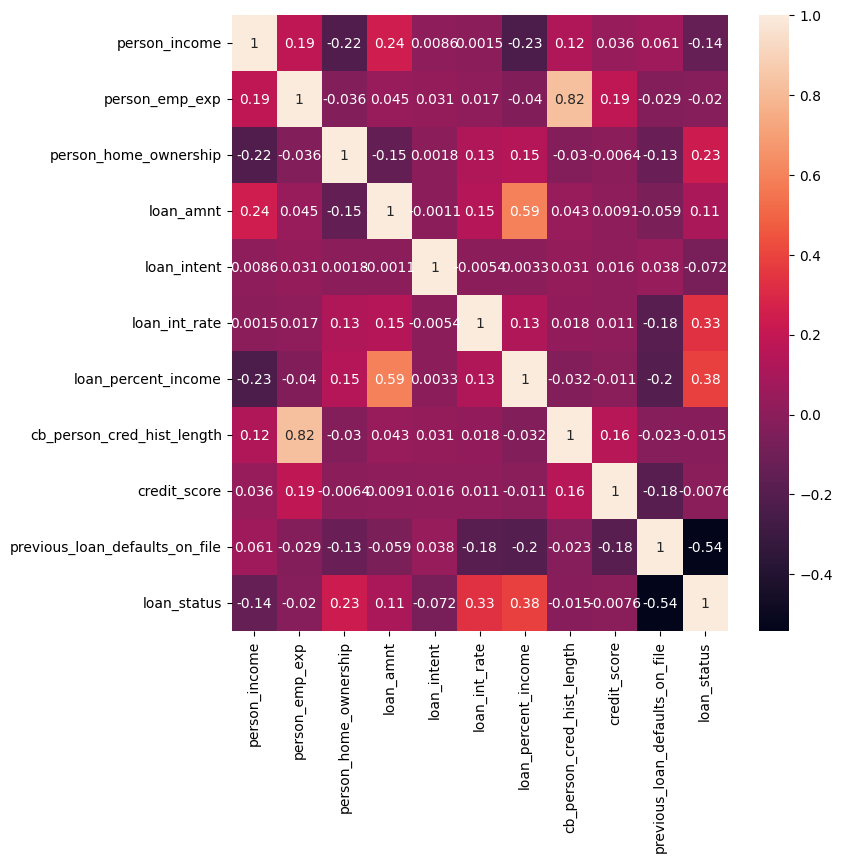

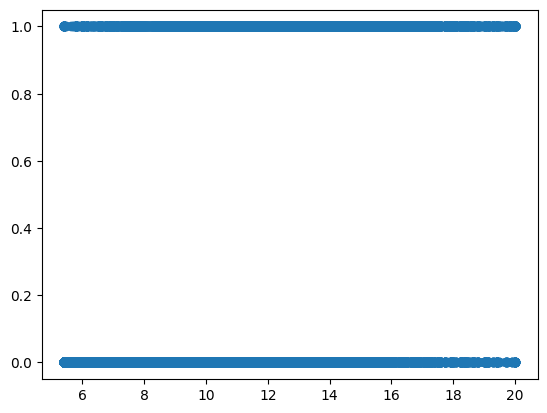

In [180]:
cor_matrix=data.iloc[:,2:].corr(numeric_only=True)
print(cor_matrix)
plt.figure(figsize=(8,8))
sns.heatmap(cor_matrix,annot=True)
plt.show()
plt.scatter(data['loan_int_rate'],data['loan_status'])
plt.show()


EXTRACTING INDEPENDENT AND DEPENDET VARIABLE

In [181]:
x=data.iloc[:,3:13].values
x=pd.DataFrame(x)
y=data['loan_status'].values
y=pd.DataFrame(y)

SPLITING DATA INTO TRAIN AND TEST DATA

In [182]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=56)


FEATURE SCALING

In [183]:
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)

MODELS BUILDING AND EVALUATE PREDICTIONS

MODEL OF KNN

In [184]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [185]:
y_predict=classifier.predict(x_test)
print(y_test)
print(y_predict)

       0
11289  0
25858  1
33330  0
16446  1
32861  0
...   ..
30244  0
28613  0
22604  1
44072  1
21071  0

[9000 rows x 1 columns]
[0 0 0 ... 0 0 0]


In [186]:
print("mse value of KNN:",metrics.mean_absolute_error(y_predict,y_test))
print('accuracy in KNN:',metrics.accuracy_score(y_predict,y_test))

mse value of KNN: 0.10122222222222223
accuracy in KNN: 0.8987777777777778


MODEL OF LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression # type: ignore
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [188]:
y_predict=model1.predict(x_test)
print(y_test)
print(y_predict)

       0
11289  0
25858  1
33330  0
16446  1
32861  0
...   ..
30244  0
28613  0
22604  1
44072  1
21071  0

[9000 rows x 1 columns]
[0 1 0 ... 1 0 0]


In [189]:
print("mse value of logistic regression:",metrics.mean_absolute_error(y_predict,y_test))
print('accuracy in logistic regression:',metrics.accuracy_score(y_predict,y_test))


mse value of logistic regression: 0.11066666666666666
accuracy in logistic regression: 0.8893333333333333


MODEL OF RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier # type: ignore
model2=RandomForestClassifier(n_estimators=10,criterion='entropy')
model2.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_predict=model2.predict(x_test)
print(y_test)
print(y_predict)

       0
11289  0
25858  1
33330  0
16446  1
32861  0
...   ..
30244  0
28613  0
22604  1
44072  1
21071  0

[9000 rows x 1 columns]
[0 1 0 ... 1 0 0]


In [192]:
print("mse value of random forest:",metrics.mean_absolute_error(y_predict,y_test))
print('accuracy in random forest:',metrics.accuracy_score(y_predict,y_test))


mse value of random forest: 0.09133333333333334
accuracy in random forest: 0.9086666666666666


MODEL OF SVM

In [ ]:
from sklearn.svm import SVC # type: ignore
model3=SVC(kernel='linear')
model3.fit(x_train,y_train)

SVC(kernel='linear')

In [194]:
y_predict=model3.predict(x_test)
print(y_test)
print(y_predict)

       0
11289  0
25858  1
33330  0
16446  1
32861  0
...   ..
30244  0
28613  0
22604  1
44072  1
21071  0

[9000 rows x 1 columns]
[0 1 0 ... 1 0 0]


In [195]:
print("mse value of svm:",metrics.mean_absolute_error(y_predict,y_test))
print('accuracy in svm:',metrics.accuracy_score(y_predict,y_test))


mse value of svm: 0.10966666666666666
accuracy in svm: 0.8903333333333333


MODEL OF DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier # type: ignore
model4=DecisionTreeClassifier(criterion='entropy',random_state=67)
model4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=67)

In [197]:
y_predict=model4.predict(x_test)
print(y_test)
print(y_predict)

       0
11289  0
25858  1
33330  0
16446  1
32861  0
...   ..
30244  0
28613  0
22604  1
44072  1
21071  0

[9000 rows x 1 columns]
[0 1 0 ... 1 0 0]


In [198]:
print("mse value of decision tree:",metrics.mean_absolute_error(y_predict,y_test))
print('accuracy in decision tree:',metrics.accuracy_score(y_predict,y_test))


mse value of decision tree: 0.12355555555555556
accuracy in decision tree: 0.8764444444444445


SUMMARY

This project aimed to predict Loan Approval Status of a bank by using loan application datas.After processing,we tested multiple models,including Logistic Regression,Decision Trees,Random Forest,SVM and KNN.The Random Forest model acheived the highest accuracy of 90.8%,making it the best performing model.